# Linear regression

we want to solve linear regression 
$${\rm minimize}_w \|{\bf X}w-{\bf y}\|_2^2$$
- first generate (input, output) paired data examples

- there is a subtlety (in notations mainly) in how we handle constant offset

- given data $x=(x[1],x[2],x[3],\cdots,x[d])$ in $d$-dimensions, 
one option is to use **linear predictor** of the form 
$$f(x) = w^Tx = w_1x[1] + w_2x[2] + \cdots, w_dx[d]$$

- another option is to use **affine predictor**, by appending a one to the data, i.e. $x=(1,x[1],x[2],x[3],\cdots,x[d])$
$$f(x) = w^Tx = w_0 + w_1x[1] + \cdots + w_d x[d]$$

- We will use these notations interchangeably, as it should be clear from the context which one we are using


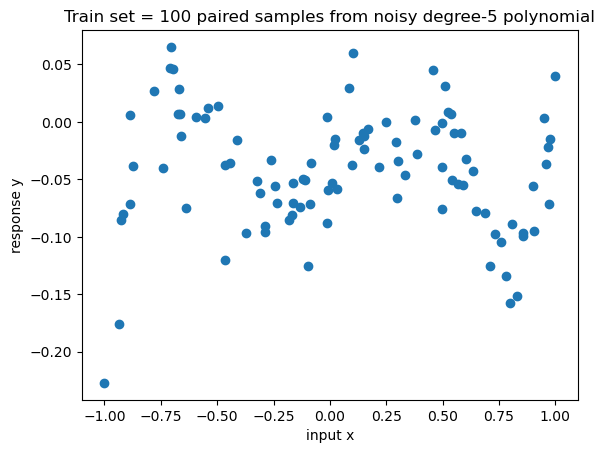

In [22]:
# generate training data
import numpy as np
n = 100 # sample size
x = np.random.uniform(-1,1,n) #sample input data
x = np.sort(x)
x[0]=-1
x[n-1]=1

# ground truth is 5-th order polynomial and we add Gaussian noise to it
y = (x-.99)*(x-.4)*(x-.25)*(x+.6)*(x+.8) + .03*np.random.randn(n)

# plot the samples and grounstruth
t = np.linspace(-1,1,100)
y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
#plt.plot(t,y0,'k-')
plt.title('Train set = 100 paired samples from noisy degree-5 polynomial')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

# generate test data
n_ = 100
x_ = np.random.uniform(-1,1,n_)
y_ = (x_-.99)*(x_-.4)*(x_-.25)*(x_+.6)*(x_+.8) + .03*np.random.randn(n_)


next, create **data matrix** ${\bf X}$
$${\bf X} = \begin{bmatrix} (x_1)^T\\ (x_2)^T\\ \vdots \\ (x_n)^T \end{bmatrix}$$
- the $i$-th row od ${\bf X}$ is input raw data of $i$-th sample, transposed
- the $j$-th column of ${\bf X}$ gives values of $j$-th data entry across $n$ data points 
- $X_{ij}$ is the value of $j$-th entry for $i$-th sample data point

## Constant fit example
we are going to ignore any input data and try to fit a constanf function $f(x)=w_1$

we create a data matrix with $x_i=1$

data matrix is 

In [23]:
# create a data matrix X
X = np.vstack([np.ones(len(x))]).T

Recall that the least squares solution is 
\begin{eqnarray} 
\hat{w}_{\rm LS} &=& (X^TX)^{-1}X^T y\\ 
&=& n^{-1} 1^T y \\
&=& \frac{1}{n}\sum_{i=1}^n y_i
\end{eqnarray}


which is just the average of the sample outcome data, 
and the prediction is 
$\hat{w}_{\rm LS} = \frac{1}{n}\sum_{i=1}^n y_i$ for all data point $x$, 


$$ \hat{y} = \begin{bmatrix} \hat{y}_1\\ \vdots\\ \hat{y}_n \end{bmatrix} = \begin{bmatrix} \hat{w}_{\rm LS}^Tx_1 \\ \vdots \\ \hat{w}_{\rm LS}^T x_n\end{bmatrix} = \hat{w}_{\rm LS} \begin{bmatrix}1\\ \vdots\\ 1\end{bmatrix}$$

hence, **the average is the best constant fit** for suqared loss

and the MSE is the variance of the outcome:

$$ \frac1n \sum_{i=1}^n ({\rm ave}(y)-y_i)^2$$

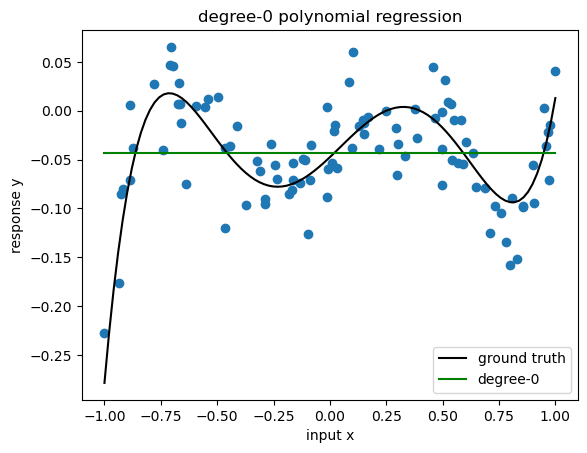

0.2709858277792123

In [24]:
# linear regression with constant feature
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh =  w*X

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(x, yh, 'g',label='degree-0')
plt.legend()
plt.title('degree-0 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh)**2)
display(MSE_train)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_))]).T
yh_ =  w*X_
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 


for **affine**  fit, we use $(1,x_i)$ as the input data, and the data matrix ${\bf X}$ is

In [25]:
# create a data matrix X
X = np.vstack([np.ones(len(x)),x]).T

the prediction has the form 
$$\hat{y} = w_1+w_2x$$
this is called **straight-line fit** and if $x$ is time, it is called **trend line**


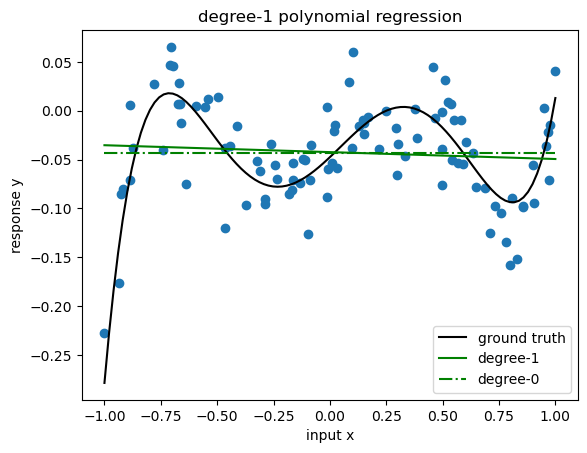

In [26]:
# linear regression
p=1
w1 = np.array(2)
w1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh1= np.matmul(X,w1)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(x, yh1, 'g',label='degree-1')
plt.plot(x, yh, 'g-.',label='degree-0')
plt.legend()
plt.title('degree-1 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh1)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_]).T
yh_= np.matmul(X_,w1)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.array([[1,MSE_train,MSE_test]])  

# Polynomial features

polynomial functions are useful features, as any smooth function can be represented by polynomials of large enough degree using Taylor expansion. 

for degere 2 polynomial, we use $(1,x,x^2)$ as feature vector

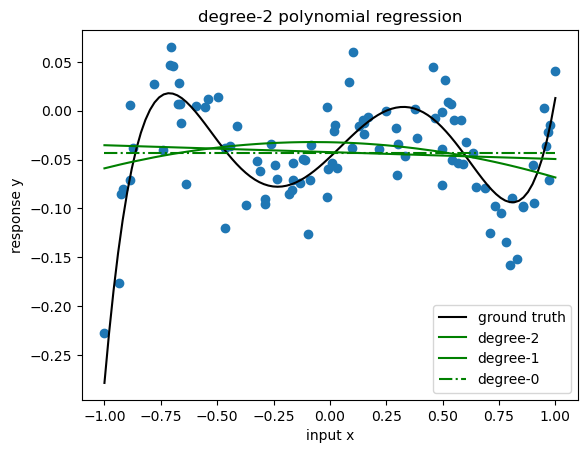

In [27]:
# create a data matrix X
p=2
X = np.vstack([np.ones(len(x)),x,x**2]).T

# degree-2 polynomial linear regression
w2 = np.array(3)
w2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh2= np.matmul(X,w2)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(x, yh2, 'g',label='degree-2')
plt.plot(x, yh1, 'g',label='degree-1')
plt.plot(x, yh, 'g-.',label='degree-0')
plt.legend()
plt.title('degree-2 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh2)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_,x_**2]).T
yh_= np.matmul(X_,w2)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.append(MSE,[[p,MSE_train,MSE_test]],axis=0)  

for p=3 degree polynomial, we use feature vector $(1,x,x^2,x^3)$

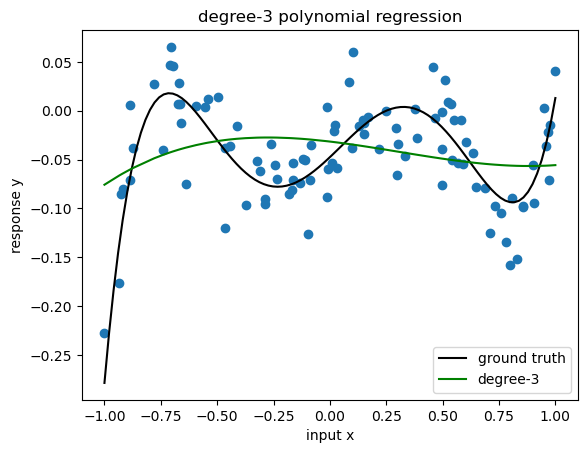

In [28]:
# create a data matrix X
p=3
X = np.vstack([np.ones(len(x)),x,x**2,x**3]).T

# degree-p polynomial linear regression
w3 = np.array(p+1)
w3 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh3= np.matmul(X,w3)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(x, yh3, 'g',label='degree-3')
plt.legend()
plt.title('degree-3 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh3)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3]).T
yh_= np.matmul(X_,w3)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.append(MSE,[[p,MSE_train,MSE_test]],axis=0)  

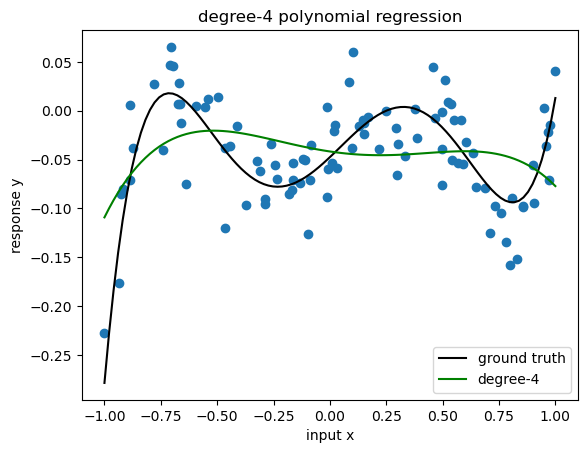

In [29]:
# create a data matrix X
p=4
X = np.vstack([np.ones(len(x)),x,x**2,x**3,x**4]).T

# degree-p polynomial linear regression
w4 = np.array(p+1)
w4 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh4= np.matmul(X,w4)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t, np.matmul(np.vstack([np.ones(len(t)),t,t**2,t**3,t**4]).T,w4), 'g',label='degree-4')
plt.legend()
plt.title('degree-4 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh4)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3,x_**4]).T
yh_= np.matmul(X_,w4)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.append(MSE,[[p,MSE_train,MSE_test]],axis=0)  

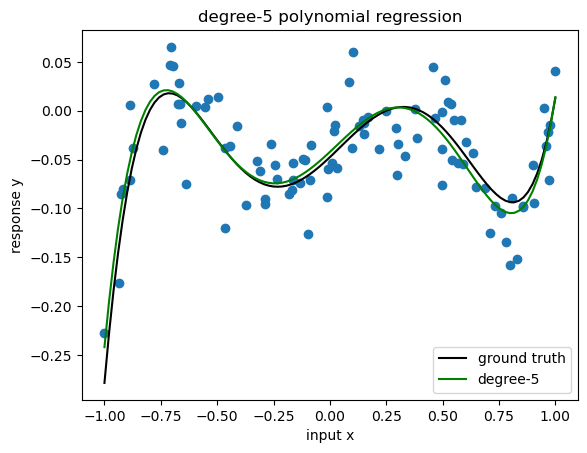

In [30]:
# create a data matrix X
p=5
X = np.vstack([np.ones(len(x)),x,x**2,x**3,x**4,x**5]).T

# degree-p polynomial linear regression
w5 = np.array(p+1)
w5 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh5= np.matmul(X,w5)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t, np.matmul(np.vstack([np.ones(len(t)),t,t**2,t**3,t**4,t**5]).T,w5), 'g',label='degree-5')
plt.legend()
plt.title('degree-5 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh5)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3,x_**4,x_**5]).T
yh_= np.matmul(X_,w5)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.append(MSE,[[p,MSE_train,MSE_test]],axis=0)  

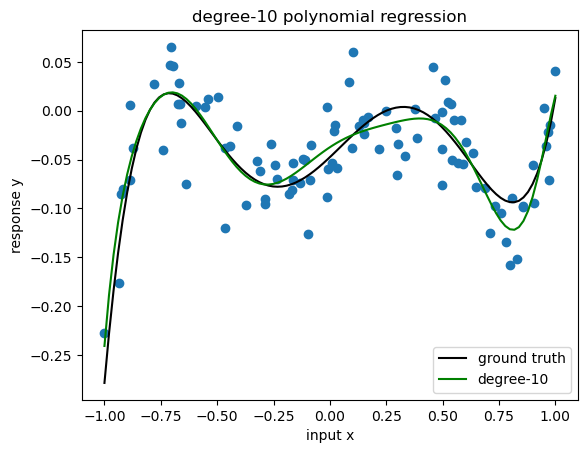

In [32]:
# create a data matrix X
p=10
X = np.vstack([np.ones(len(x)),x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10]).T

# degree-p polynomial linear regression
w10 = np.array(p+1)
w10 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh10= np.matmul(X,w10)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t, np.matmul(np.vstack([np.ones(len(t)),t,t**2,t**3,t**4,t**5,t**6,t**7,t**8,t**9,t**10]).T,w10), 'g',label='degree-10')
plt.legend()
plt.title('degree-10 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh10)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3,x_**4,x_**5,x_**6,x_**7,x_**8,x_**9,x_**10]).T
yh_= np.matmul(X_,w10)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.append(MSE,[[p,MSE_train,MSE_test]],axis=0)  

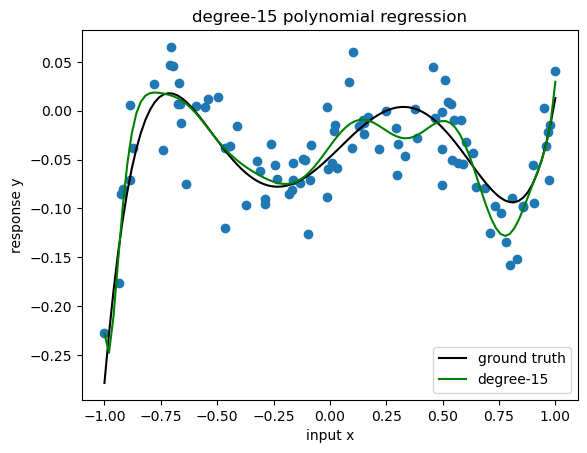

In [33]:
# create a data matrix X
p=15
X = np.vstack([np.ones(len(x)),x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13,x**14,x**15]).T

# degree-p polynomial linear regression
w15 = np.array(p+1)
w15 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh15= np.matmul(X,w15)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t, np.matmul(np.vstack([np.ones(len(t)),t,t**2,t**3,t**4,t**5,t**6,t**7,t**8,t**9,t**10,t**11,t**12,t**13,t**14,t**15]).T,w15), 'g',label='degree-15')
plt.legend()
plt.title('degree-15 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh15)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3,x_**4,x_**5,x_**6,x_**7,x_**8,x_**9,x_**10,x_**11,x_**12,x_**13,x_**14,x_**15]).T
yh_= np.matmul(X_,w15)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.append(MSE,[[p,MSE_train,MSE_test]],axis=0)  

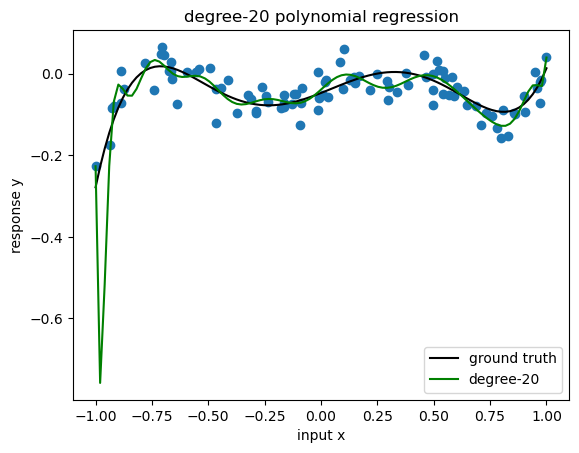

In [34]:
# create a data matrix X
p=20
X = np.vstack([np.ones(len(x)),x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13,x**14,x**15,x**16,x**17,x**18,x**19,x**20]).T

# degree-p polynomial linear regression
w20 = np.array(p+1)
w20 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
yh20= np.matmul(X,w20)

plt.plot(x,y,'o')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t, np.matmul(np.vstack([np.ones(len(t)),t,t**2,t**3,t**4,t**5,t**6,t**7,t**8,t**9,t**10,t**11,t**12,t**13,t**14,t**15,t**16,t**17,t**18,t**19,t**20]).T,w20), 'g',label='degree-20')
plt.legend()
plt.title('degree-20 polynomial regression')
plt.xlabel("input x")
plt.ylabel("response y")
plt.show()

MSE_train = (1/float(n))*np.sum((y - yh20)**2)

# MSE on fresh data not used in training
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3,x_**4,x_**5,x_**6,x_**7,x_**8,x_**9,x_**10,x_**11,x_**12,x_**13,x_**14,x_**15,x_**16,x_**17,x_**18,x_**19,x_**20]).T
yh_= np.matmul(X_,w20)
MSE_test  = (1/float(n_))*np.sum((y_ - yh_)**2) 
MSE = np.append(MSE,[[p,MSE_train,MSE_test]],axis=0)  

feature engineering requires domain knowledge about what are good features for the application



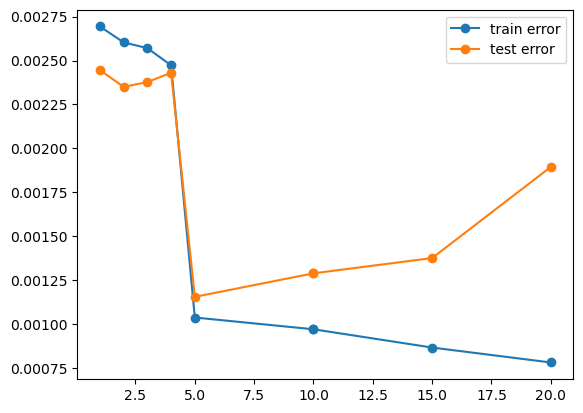

In [35]:
import matplotlib.pyplot as plt
plt.plot(MSE.T[0],MSE.T[1],'o-',label='train error')
plt.plot(MSE.T[0],MSE.T[2],'o-',label='test error')
plt.legend()
plt.show()

- the **training error** always decrease as we increase the complexity of the model (which in this example is increasing the degree of the polynomial)
- on the other hand, the **test error** that we compute, which is the average error over fresh drawn samples, has a sweet spot where the test error is minimum
- this corresponds usually to the true complexity of the model, which in this case is degree-5 polynomial
-although we did not know (just frmo the samples) that the ground truth is a degree-5 polynomial, we could use the test error to guess the degree of the model we need to use to fit this data (and this process is known as hyper parameter tuning using test error)
- we will learn much more about it in next couple of weeks